# Proof-of-concept of a Nonlinear Structural Stability Constraint for Aeroelastic Optimizations

***

This notebook shows how to produce the figures published in the paper titled _Proof-of-concept of a Nonlinear Structural Stability Constraint for Aeroelastic Optimizations_, presented at the RAeS 8th Aircraft Structural Design Conference in October 2023 and authored by Francesco M. A. Mitrotta, Alberto Pirrera, Terence Macquart, Jonathan E. Cooper, Alex Pereira do Prado and Pedro Higino Cabral.

* [Nonlinear structural stability of canonical examples](#canonical-examples)
    * [Supercritical pitchfork bifurcation](#supercritical-pitchfork)
    * [Broken supercritical pitchfork](#broken-pitchfork)
    * [Limit point bifurcation](#limit-point)
* [Nonlinear structural stability of a CRM-like box beam](#crm-like-box-beam)
* [Optimization of the CRM-like box beam with nonlinear structural stability constraints](#optimization)

In [1]:
import os

# Define name of directory where to save analyses and figures
analysis_directory_name = "RAeS_2023"
ANALYSIS_DIRECTORY_PATH = os.path.join(os.getcwd(), "analyses", analysis_directory_name)

## Nonlinear structural stability of canonical examples <a name="canonical-examples"></a>

***

### Supercritical pitchfork bifurcation <a name="supercritical-pitchfork"></a>

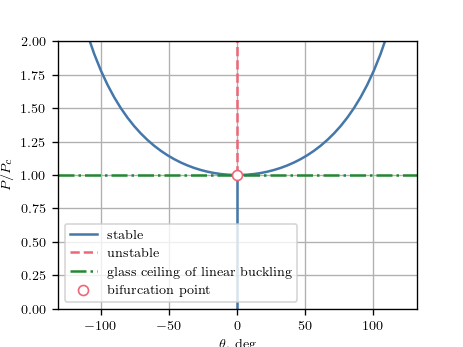

In [2]:
%matplotlib widget

import matplotlib.pyplot as plt  # package for creating figures and plots
import tol_colors as tc  # package for colorblind-friendly colors
import numpy as np  # package for scientific computing

textwidth_inches = 5.146571  # paper textwidth in inches
fig_height_inches = textwidth_inches*(4.8/6.4)  # default figure height in inches

plt.rc("axes", prop_cycle=plt.cycler("color", list(tc.tol_cset("bright"))))  # set default color cycle to TOL bright
plt.rcParams["figure.dpi"] = 120  # set default dpi of figures
plt.rcParams.update({"text.usetex": True, "font.family": "serif"})  # set default font to serif
default_font_size = 8  # default font size of figures
plt.rcParams["font.size"] = default_font_size  # set default font size of figures

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]  # retrieve list with succession of standard matplotlib colors
UNSTABLE_COLOR = colors[1]  # red
GLASS_CEILING_COLOR = colors[2]  # green
del colors[1:3]  # delete green and red from list of colors

# Plot trivial stable solution of perfect system
scale = 0.75  # scale of figure
fig, ax = plt.subplots(figsize=(textwidth_inches*scale, fig_height_inches*scale))
theta_trivial_stable = np.array([0., 0.])  # deg
load_trivial_stable = np.array([0., 1.])
stable_line = ax.plot(theta_trivial_stable, load_trivial_stable, label="stable")

# Plot nontrivial stable solution of perfect system
theta_max = 120  # deg
theta_nontrivial = np.linspace(-theta_max, theta_max)  # deg
load_nontrivial = np.deg2rad(theta_nontrivial)/np.sin(np.deg2rad(theta_nontrivial))
ax.plot(theta_nontrivial, load_nontrivial, color=stable_line[0].get_color())

# Plot trivial unstable solution of perfect system
theta_trivial_unstable = np.array([0., 0.])  # deg
load_trivial_unstable = np.array([1., np.max(load_nontrivial)])
ax.plot(theta_trivial_unstable, load_trivial_unstable, UNSTABLE_COLOR, linestyle="--", label="unstable")

# Plot glass ceiling of linear buckling
ax.axhline(y=1, color=GLASS_CEILING_COLOR, linestyle="-.", label="glass ceiling of linear buckling")

# Plot bifurcation point
ax.plot(0, 1, "o", mec=UNSTABLE_COLOR, mfc="w", label="bifurcation point")

# Set plot appearance
ax.set_xlabel("$\\theta,\,\mathrm{deg}$")
ax.set_ylabel("$P/P_c$")
ax.set_ylim([0, 2])
ax.legend()
ax.grid()
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "CollinearRodsPitchfork.svg"), format="svg", bbox_inches="tight", pad_inches=0)

### Broken supercritical pitchfork <a name="broken-pitchfork"></a>

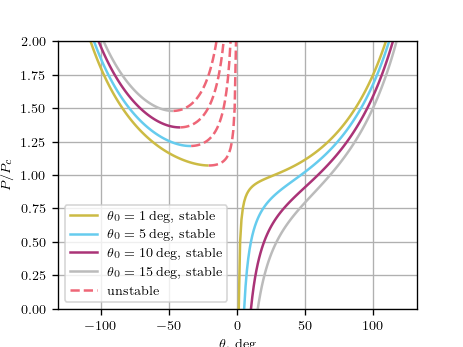

In [3]:
from matplotlib.lines import Line2D  # package for custom legend

color_starting_index = 1  # index of first color to use for plotting
imperfections = [1, 5, 10, 15]  # [deg]
fig, ax = plt.subplots(figsize=(textwidth_inches*scale, fig_height_inches*scale))
for count, theta_0 in enumerate(imperfections):  # iterate through initial angles theta_0
    theta_negative = np.arange(-theta_max, 0)
    theta_positive = np.arange(theta_0, theta_max + 1)
    load_theta_negative = np.deg2rad(theta_negative - theta_0)/np.sin(np.deg2rad(theta_negative))
    load_theta_positive = np.deg2rad(theta_positive - theta_0)/np.sin(np.deg2rad(theta_positive))
    stability_theta_negative = np.deg2rad(theta_negative - theta_0)/np.tan(np.deg2rad(theta_negative))
    ax.plot(theta_negative[stability_theta_negative<1], load_theta_negative[stability_theta_negative<1],
    color=colors[color_starting_index + count], label=f"$\\theta_0={theta_0:d}\,\mathrm{{deg}}$, stable")
    ax.plot(theta_negative[stability_theta_negative>1], load_theta_negative[stability_theta_negative>1], UNSTABLE_COLOR, linestyle="--")
    ax.plot(theta_positive, load_theta_positive, color=colors[color_starting_index + count])
ax.set_xlabel("$\\theta,\,\mathrm{deg}$")
ax.set_ylabel("$P/P_c$")
ax.set_ylim([0, 2])
handles, labels = ax.get_legend_handles_labels()
handles.append(Line2D([0], [0], color=UNSTABLE_COLOR, linestyle="--", label="unstable"))
labels.append("unstable")
ax.legend(handles=handles, labels=labels)
ax.grid()
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "CollinearRodsBrokenPitchfork.svg"), format="svg", bbox_inches="tight", pad_inches=0)

### Limit point bifurcation <a name="limit-point"></a>

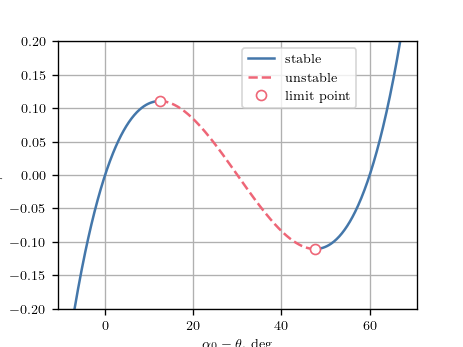

In [4]:
alpha_0 = 30  # deg
theta_max = 37  # deg
step = 0.1  # deg
theta = np.arange(-theta_max, theta_max + step, step)  # deg

nondimensional_load = 4 * (np.sin(np.deg2rad(theta)) - np.cos(np.deg2rad(alpha_0)) * np.tan(np.deg2rad(theta)))
stability = (np.cos(np.deg2rad(alpha_0)) - np.cos(np.deg2rad(theta))**3) / np.cos(np.deg2rad(theta))

# Create an array for alpha_0 - theta
alpha_minus_theta = alpha_0 - theta

# Split data into segments with the same sign of stability
segments = []
current_segment_indices = []
limit_point_indices = []
for i in range(len(alpha_minus_theta)):
    if i == 0 or np.sign(stability[i]) == np.sign(stability[i - 1]):
        current_segment_indices.append(i)
    else:
        segments.append(current_segment_indices)
        current_segment_indices = [i]
        limit_point_indices.append(i - 1)  # the limit point is taken as the last point with same stability for visualization purposes
segments.append(current_segment_indices)  # Append the last segment

# Create a figure and axis
fig, ax = plt.subplots(figsize=(textwidth_inches*scale, fig_height_inches*scale))

# Plot line segments separately based on stability sign
for segment in segments:
    if stability[segment[0]] >= 0:
        ax.plot(alpha_minus_theta[segment], nondimensional_load[segment], color=colors[0])
    else:
        ax.plot(alpha_minus_theta[segment], nondimensional_load[segment], color=UNSTABLE_COLOR, linestyle="--")
ax.plot(alpha_minus_theta[limit_point_indices], nondimensional_load[limit_point_indices], "o", mec=UNSTABLE_COLOR, mfc="w")

# Label the axes and set limts
plt.xlabel("$\\alpha_0 - \\theta,\,\mathrm{deg}$")
plt.ylabel("$P/kl$")
plt.ylim([-0.2, 0.2])

# Create proxy artists for the legend
stable_line = Line2D([0], [0], color=colors[0], label="stable")
unstable_line = Line2D([0], [0], color=UNSTABLE_COLOR, linestyle="--", label="unstable")
limit_point = Line2D([0], [0], marker="o", mec=UNSTABLE_COLOR, mfc="w", linestyle="None", label="limit point")

# Display the legend with the proxy artists
plt.legend(handles=[stable_line, unstable_line, limit_point], loc="upper right", bbox_to_anchor=(0.85, 1.))

# Show the plot
plt.grid(True)
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "InclinedRodsLimitPoint.svg"), format="svg", bbox_inches="tight", pad_inches=0)

Plot two limit point bifurcations side by side.

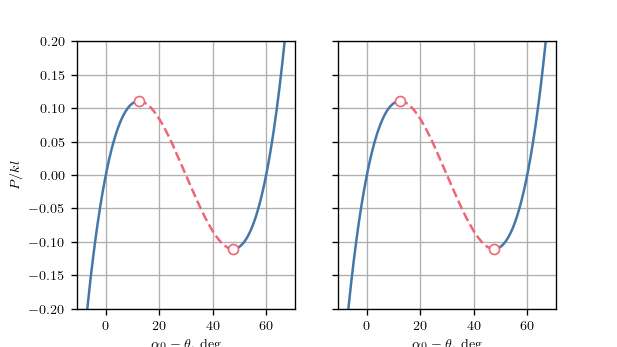

In [5]:
# Create a figure and two subplots side by side, sharing the y-axis
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(textwidth_inches, fig_height_inches*scale))

# Plot line segments separately based on stability sign in both subplots
for ax in axs:
    for segment in segments:
        if stability[segment[0]] >= 0:
            ax.plot(alpha_minus_theta[segment], nondimensional_load[segment], color=colors[0])
        else:
            ax.plot(alpha_minus_theta[segment], nondimensional_load[segment], color=UNSTABLE_COLOR, linestyle="--")
    ax.plot(alpha_minus_theta[limit_point_indices], nondimensional_load[limit_point_indices], "o", mec=UNSTABLE_COLOR, mfc="w")
    # Label the axes and set limits for both subplots
    ax.set_xlabel("$\\alpha_0 - \\theta,\,\mathrm{deg}$")
    ax.set_ylim([-0.2, 0.2])
    ax.grid(True)

# Label the y-axis only for the left subplot
axs[0].set_ylabel("$P/kl$")

# Show the plot
plt.grid(True)
plt.show()

# Save the figure (You might need to define ANALYSIS_DIRECTORY_PATH)
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "LimitPointBifurcationSideBySide.svg"), format="svg", bbox_inches="tight", pad_inches=0)

## Nonlinear structural stability of a CRM-like box beam <a name="crm-like-box-beam"></a>

***

Geometrical and material properties.

In [6]:
l = 29.38e3  # [mm] box beam length
w = 3.41e3  # [mm] box beam width
h = 0.77e3  # [mm] box beam height
t = h/100  # [mm] initial box beam thickness
stiffeners_height = h/10  # [mm] stiffeners height
no_stiffeners = 2  # number of stiffeners
stiffeners_x_locations = np.linspace(0, w, no_stiffeners + 2)[1:-1]  # [mm] stiffeners x-coordinates
stiffeners_spacing = w/(no_stiffeners + 1)  # [mm] stiffeners spacing
ribs_spacing = stiffeners_spacing*1.4 # [mm] ribs spacing
no_ribs = round(l/ribs_spacing) + 1  # number of ribs
ribs_y_locations = np.linspace(0, l, no_ribs)  # [mm] ribs y-coordinates
print(f"Number of stiffeners per skin: {no_stiffeners:d}\nNumber of ribs: {no_ribs:d}")  # print number of stiffeners and ribs
rho = 2780e-12  # density [tons/mm^3]
E = 73.1e3  # Young's modulus [MPa]
nu = 0.3  # Poisson's ratio

Number of stiffeners per skin: 2
Number of ribs: 19


Plot the external geometry.

c:\Users\qa21944\Anaconda3\envs\phd-jupyter-notebooks-py39\lib\site-packages\pyvista\plotting\plotting.py:6138: UserWarning: 
Set `jupyter_backend` backend to `"none"` to take a screenshot within a notebook environment.
  warnings.warn(


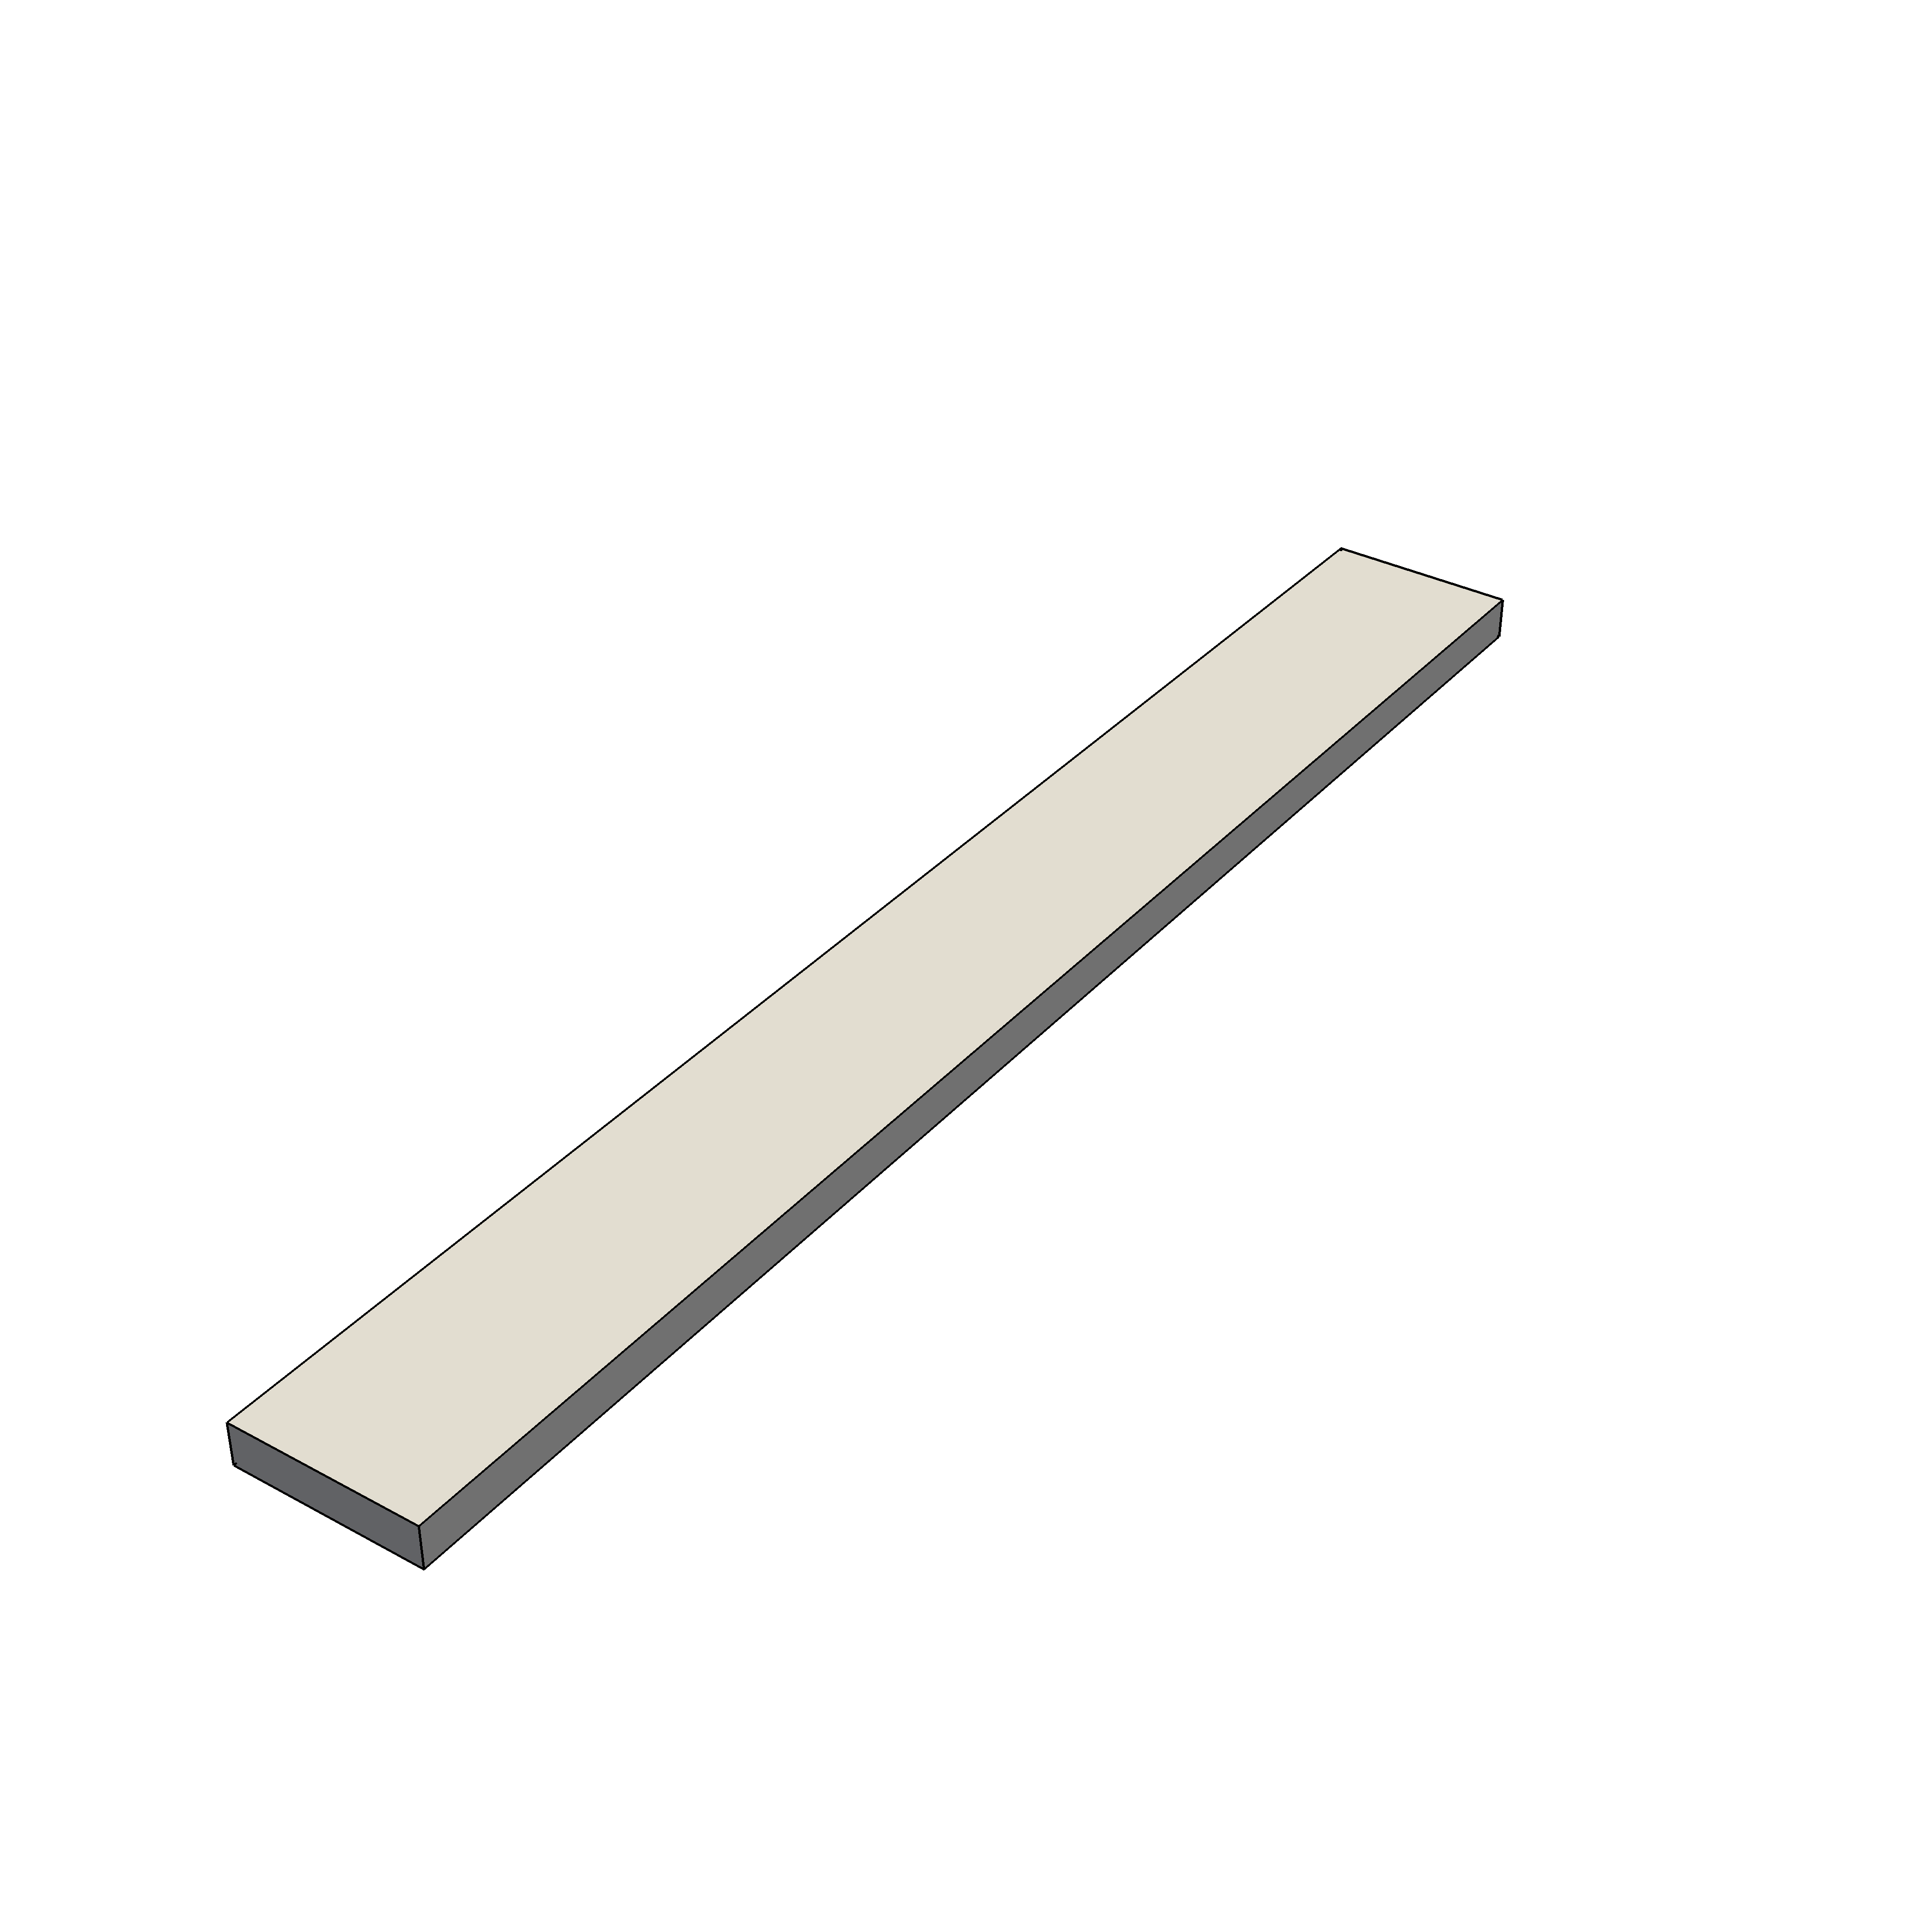

In [7]:
import pyvista
from resources import box_beam_utils

pyvista.rcParams["transparent_background"] = True

# Discretize top and bottom skin
top_skin = pyvista.Plane(center=[w/2, l/2, h/2], direction=[0, 0, 1], i_size=w, j_size=l, i_resolution=1, j_resolution=1)
bottom_skin = pyvista.Plane(center=[w/2, l/2, -h/2], direction=[0, 0, -1], i_size=w, j_size=l, i_resolution=1, j_resolution=1)
# Discretize front and rear spar
front_spar = pyvista.Plane(center=[0, l/2, 0], direction=[-1, 0, 0], i_size=h, j_size=l, i_resolution=1, j_resolution=1)
rear_spar = pyvista.Plane(center=[w, l/2, 0], direction=[1, 0, 0], i_size=h, j_size=l, i_resolution=1, j_resolution=1)
# Discretize root and tip ribs
root_rib = pyvista.Plane(center=[w/2, 0, 0], direction=[0, -1, 0], i_size=w, j_size=h, i_resolution=1, j_resolution=1)
tip_rib = pyvista.Plane(center=[w/2, l, 0], direction=[0, 1, 0], i_size=w, j_size=h, i_resolution=1, j_resolution=1)
# Merge parts together and plot
merged_parts = top_skin.merge([bottom_skin] + [front_spar] + [rear_spar] + [root_rib] + [tip_rib])
pl = pyvista.Plotter(notebook=True, window_size=[4000, 4000])
pl.add_mesh(merged_parts, show_edges=True, line_width=5)
pl.camera.azimuth = 80
pl.show(jupyter_backend="static", screenshot=os.path.join(ANALYSIS_DIRECTORY_PATH, "ExternalGeometry.png"))

Plot internal geometry.

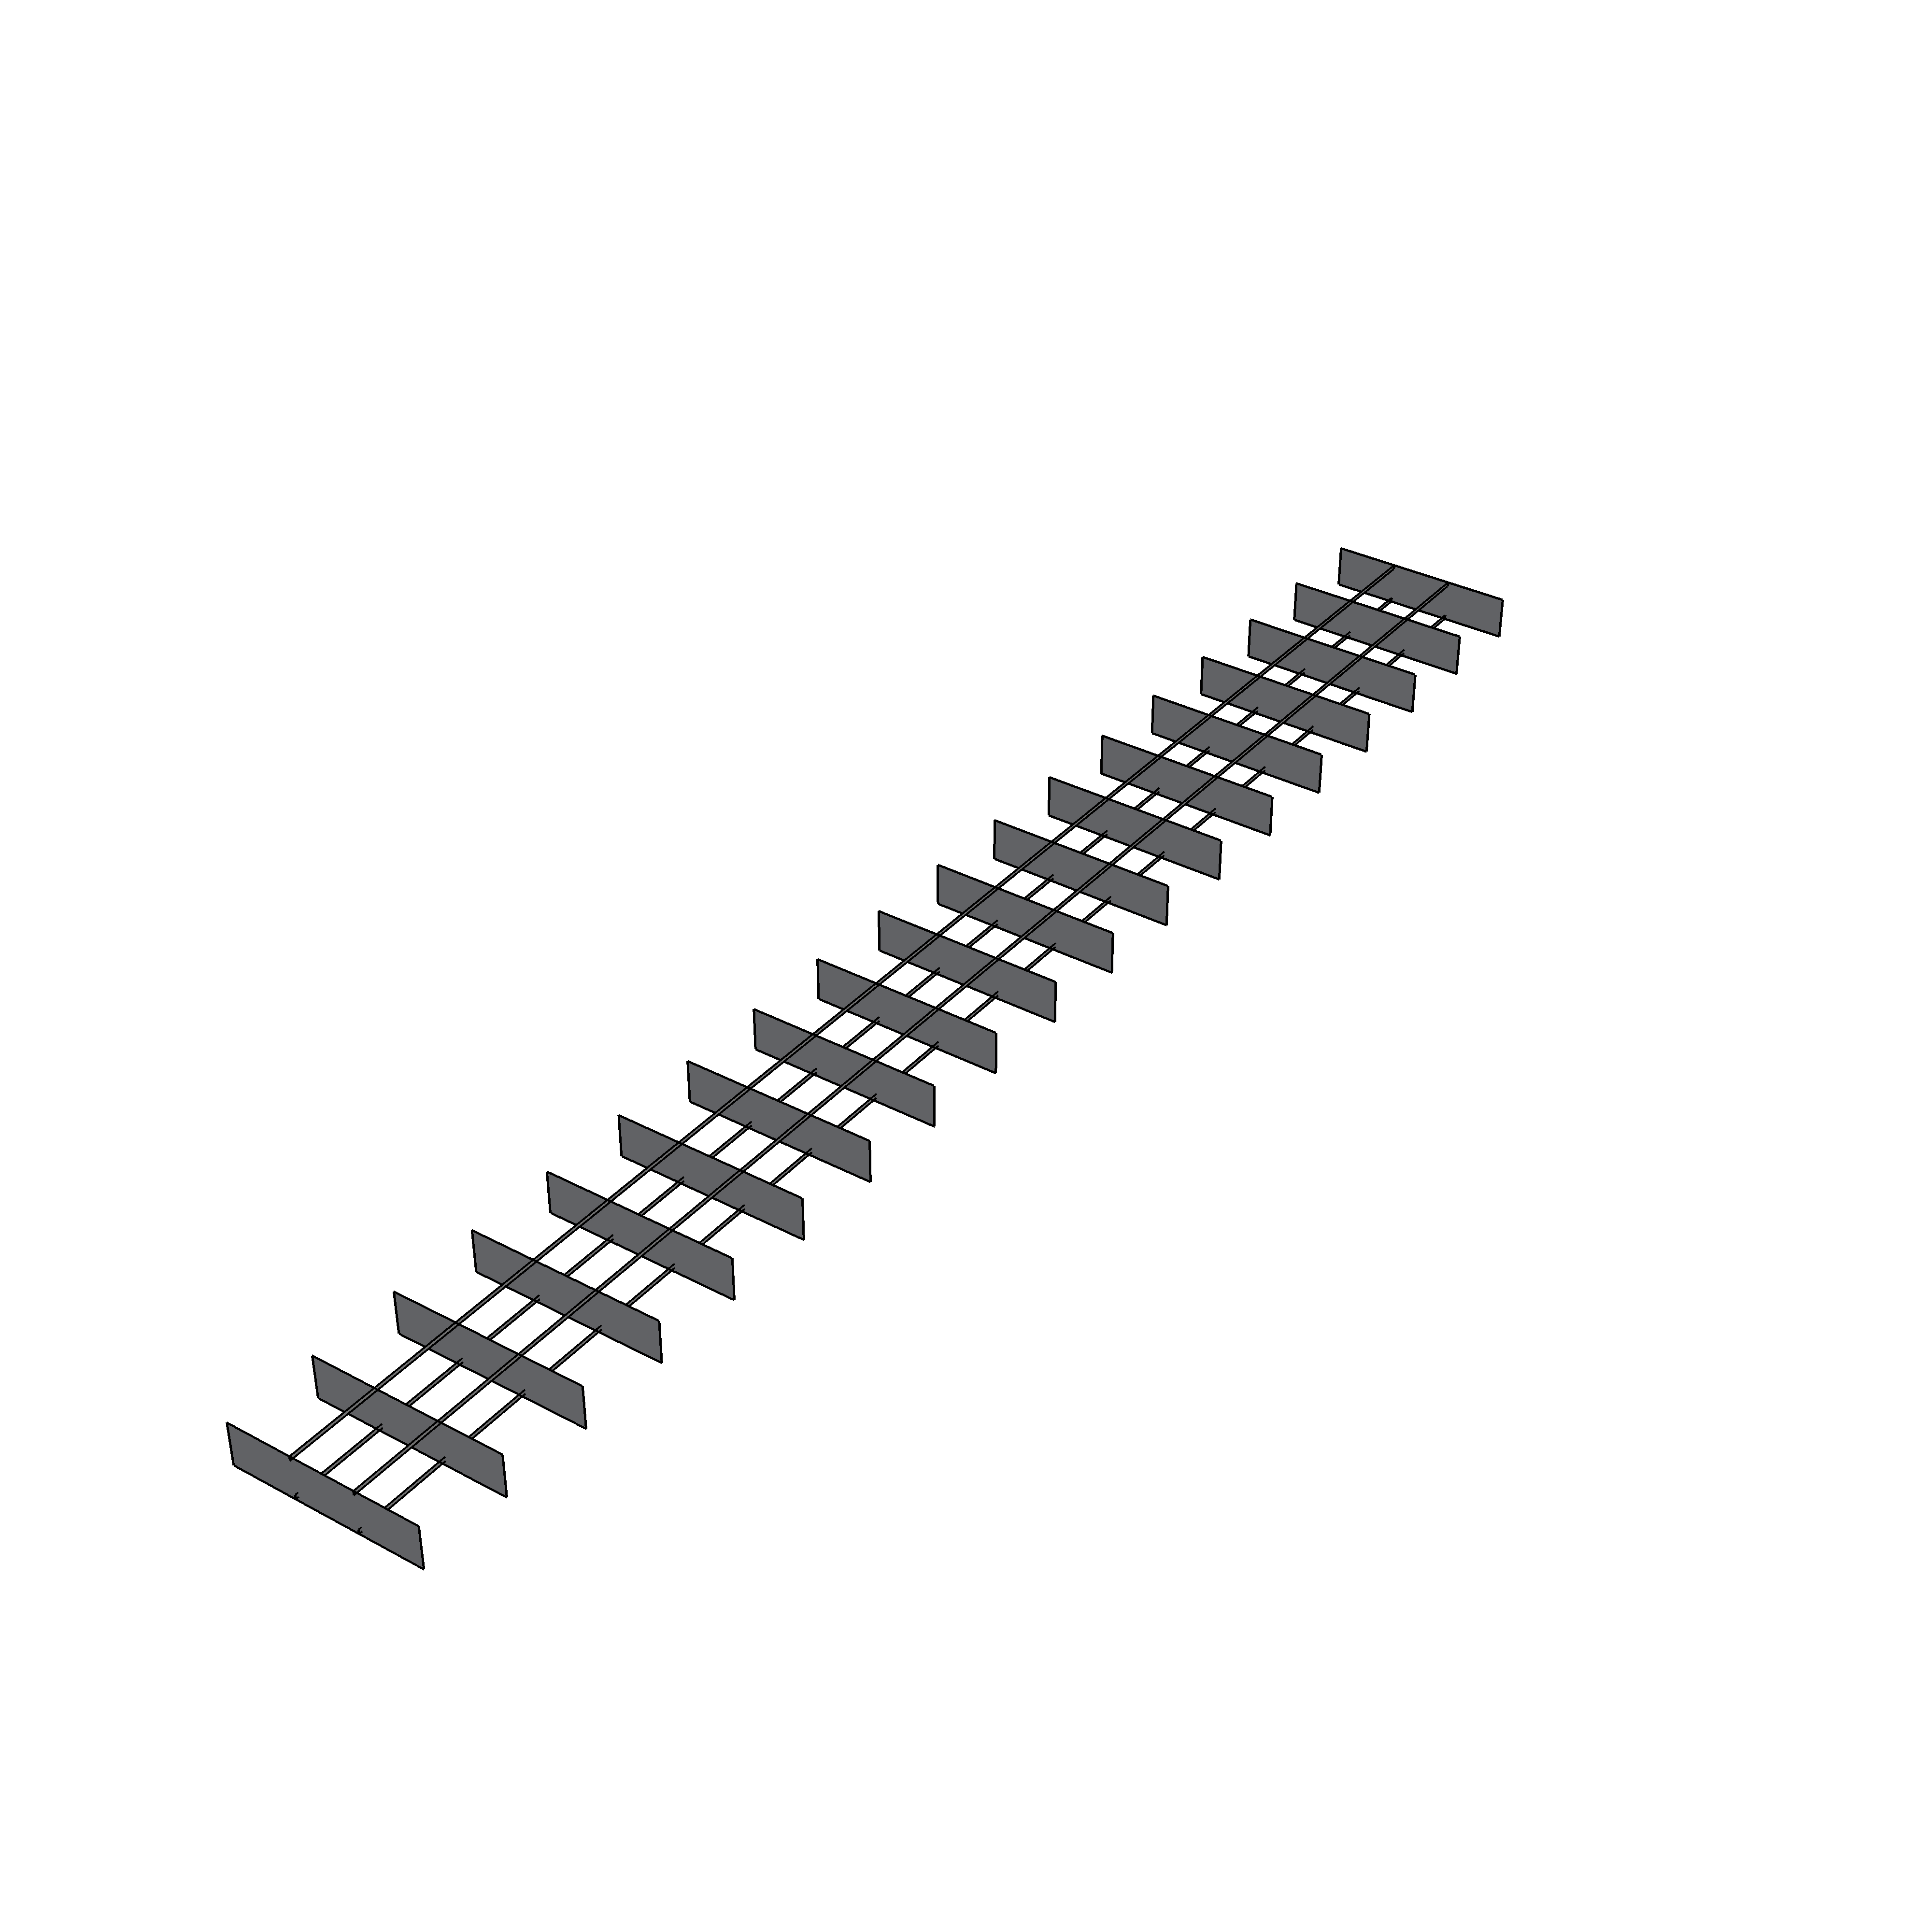

In [8]:
# Initialize lists of the PolyData objects corresponding to the box segments and to the ribs
ribs = []
rib_segments_x_coordinates = np.concatenate(([0.], stiffeners_x_locations, [w]))  # create array of the x-coordiantes defining the rib segments
rib_segments_widths = np.ediff1d(rib_segments_x_coordinates)  # calculate the width of each rib segment
# Iterate through the y-coordinates of the rib, except last one
for y in ribs_y_locations:
    # Discretize current rib and add PolyData object to the list
    ribs = ribs + [pyvista.Plane(center=[w/2, y, 0], direction=[0, 1, 0], i_size=w, j_size=h, i_resolution=1, j_resolution=1)]
# Initialize lists of the PolyData objects corresponding to the stiffeners
top_stiffeners = []
bottom_stiffeners = []
# Iterate through the x-coordinates of the stiffeners, except last one
for count, x in enumerate(stiffeners_x_locations):
    # Discretize top stiffener
    top_stiffeners.append(pyvista.Plane(center=[x, l/2, h/2 - stiffeners_height/2], direction=[1, 0, 0], i_size=stiffeners_height, j_size=l,
                                        i_resolution=1, j_resolution=1))
    # Discretize bottom stiffener
    bottom_stiffeners.append(pyvista.Plane(center=[x, l/2, -h/2 + stiffeners_height/2], direction=[1, 0, 0], i_size=stiffeners_height,
                                           j_size=l, i_resolution=1, j_resolution=1))
# Merge all box segments and ribs together
merged_parts = ribs[0].merge(ribs[1:] + top_stiffeners + bottom_stiffeners)
pl = pyvista.Plotter(notebook=True, window_size=[4000, 4000])
pl.add_mesh(merged_parts, show_edges=True, line_width=5)
pl.camera.azimuth = 80
pl.show(jupyter_backend="static", screenshot=os.path.join(ANALYSIS_DIRECTORY_PATH, "InternalGeometry.png"))

Plot mesh convergence study results

In [9]:
from resources import pynastran_utils

def apply_tip_concentrated_load(bdf_input, force_id):
    # Add master node at the center of the tip section
    master_node_id = len(bdf_input.nodes) + 1
    bdf_input.add_grid(master_node_id, [w/2, l, 0.])
    # Find id of the nodes on the edge of the tip rib
    tolerance = t/10  # we define a geometric tolerance to find the nodes on the edge of the tip rib equal to 1/10 of the cross-sectional thickness
    tip_edge_nodes_ids = [nid for nid in bdf_input.nodes if (np.abs(bdf_input.nodes[nid].xyz[1] - l) < tolerance) &
                          (np.abs((bdf_input.nodes[nid].xyz[0]) < tolerance) | (np.abs(bdf_input.nodes[nid].xyz[0] - w) < tolerance) |
                          (np.abs(bdf_input.nodes[nid].xyz[2] - h/2) < tolerance) | (np.abs(bdf_input.nodes[nid].xyz[2] + h/2) < tolerance))]
    # Add RBE3 to connect master node with edge nodes of tip rib
    rbe3_eid = len(bdf_input.elements) + 1
    bdf_input.add_rbe3(eid=rbe3_eid, refgrid=master_node_id, refc='123456', weights=[1.]*len(tip_edge_nodes_ids),
                       comps=['123456']*len(tip_edge_nodes_ids), Gijs=tip_edge_nodes_ids)
    # Add concentrated force
    force_direction = [0., 0., 1.]
    pynastran_utils.add_unitary_force(bdf_object=bdf_input, nodes_ids=[master_node_id], set_id=force_id, direction_vector=force_direction)
    # Return id of master node
    return master_node_id

force_set_id = 11  # define FORCE card identification number
eigenvalue_calculation_subcase_id = 2  # define subcase id of eigenvalue calculation

# Define shell elements' lengths to be used for the mesh convergence study and print them to screen
shell_element_lengths = np.geomspace(h/2, stiffeners_height/8, 10) # [m]
shell_element_lengths = [shell_element_lengths[2]]
print("Prescribed length of shell elements for mesh convergence study [mm]:")
print(shell_element_lengths)

# Initialize arrays with number of elements, number of degrees of freedom and linear buckling loads
no_elements = np.empty(np.shape(shell_element_lengths), dtype=int)
dofs = np.empty(np.shape(shell_element_lengths))
linear_buckling_loads = np.empty(np.shape(shell_element_lengths))

# Iterate through the different edge lengths
for count, element_length in enumerate(shell_element_lengths):
    # Generate base bdf input
    box_beam_mesh = box_beam_utils.mesh_stiffened_box_beam_with_pyvista(width=w, height=h, ribs_y_coordinates=ribs_y_locations,
                                                                        stiffeners_x_coordinates=stiffeners_x_locations,
                                                                        stiffeners_height=stiffeners_height, element_length=element_length)
    nodes_xyz_array = box_beam_mesh.points
    nodes_connectivity_matrix = box_beam_mesh.faces.reshape(-1, 5)[:, 1:]
    linear_buckling_bdf = box_beam_utils.create_base_bdf_input(young_modulus=E, poisson_ratio=nu, density=rho, shell_thickness=t,
                                                               nodes_xyz_array=nodes_xyz_array,
                                                               nodes_connectivity_matrix=nodes_connectivity_matrix)
    # Apply concetrated load at the tip
    apply_tip_concentrated_load(linear_buckling_bdf, force_set_id)
    # Store number of elements and number of degrees of freedom of current model
    no_elements[count] = len(linear_buckling_bdf.elements)
    constrained_nodes_ids = next(iter(linear_buckling_bdf.spcs.values()))[0].node_ids
    dofs[count] = (len(linear_buckling_bdf.nodes) - len(constrained_nodes_ids))*6
    # Run SOL 105 and return OP2 object
    input_name = f"linear_buckling_{no_elements[count]}_elements"
    sol_105_op2 = pynastran_utils.run_sol_105_buckling_analysis(bdf_object=linear_buckling_bdf, static_load_set_id=force_set_id,
                                                                analysis_directory_path=ANALYSIS_DIRECTORY_PATH, input_name=input_name,
                                                                run_flag=False)
    # Find critical buckling load and print it
    print(f"\n\033[1mResults of model with:\n- {element_length:.0f} mm prescribed element length\n- {no_elements[count]:.0f} elements\033[0m\n", 
          f"\033[1m- {dofs[count]:.0f} degrees of freedom\033[0m")
    linear_buckling_loads[count] = sol_105_op2.eigenvectors[eigenvalue_calculation_subcase_id].eigr
    print(f"Buckling load: {linear_buckling_loads[count]:.0f} N")

Prescribed length of shell elements for mesh convergence study [mm]:
[169.60841595192235]


NameError: name 'E' is not defined

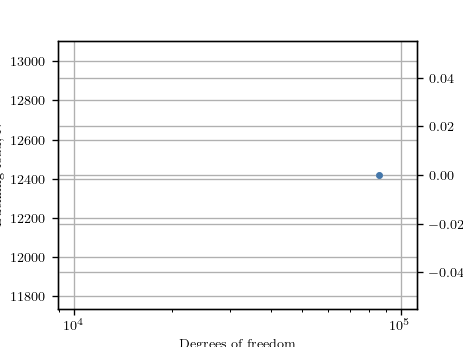

In [ ]:
# Plot buckling loads vs degrees of freedom with a log scale along the x-axis
fig, ax1 = plt.subplots(figsize=(textwidth_inches*scale, fig_height_inches*scale))  # create a figure and set of axes
buckling_load_line = ax1.semilogx(dofs, linear_buckling_loads, 'o-')

# Create a twin set of axes to plot percentage difference vs degrees of freedom
ax2 = ax1.twinx()
percentage_diff = (linear_buckling_loads/linear_buckling_loads[-1]-1)*100
percentage_diff_line = ax2.plot(dofs, percentage_diff, "o-")

# Set plot appearance
ax1.set_xlabel("Degrees of freedom")
ax1.set_ylabel("Buckling load, N")
ax2.set_ylabel("Difference w.r.t. finest mesh, \%")
ax1.grid(True)
ax2.grid(True)
plt.show()
# fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "MeshConvergenceStudy.svg"), format="svg", bbox_inches="tight", pad_inches=0)

In [ ]:
converged_mesh_index = np.where(np.abs(percentage_diff) < 1)[0][0]  # find index corresponding to first percentage difference below 1
element_length_converged_mesh = shell_element_lengths[converged_mesh_index]  # store shell length of converged mesh
no_elements_converged_mesh = no_elements[converged_mesh_index]  # store number of elements of converged mesh
sol_105_buckling_load = linear_buckling_loads[converged_mesh_index]  # store buckling load of converged mesh
print(f"The mesh is converged for a target shell element length of {element_length_converged_mesh:.0f} mm, ",
      f"corresponidng to {no_elements_converged_mesh} elements, ",
      f"{dofs[converged_mesh_index]:.0f} degrees of freedom and to a linear buckling load of {sol_105_buckling_load:.0f} N.")

The mesh is converged for a target shell element length of 170 mm,  corresponidng to 14976 elements,  85866 degrees of freedom and to a linear buckling load of 12419 N.


Plot buckling mode of converged mesh.

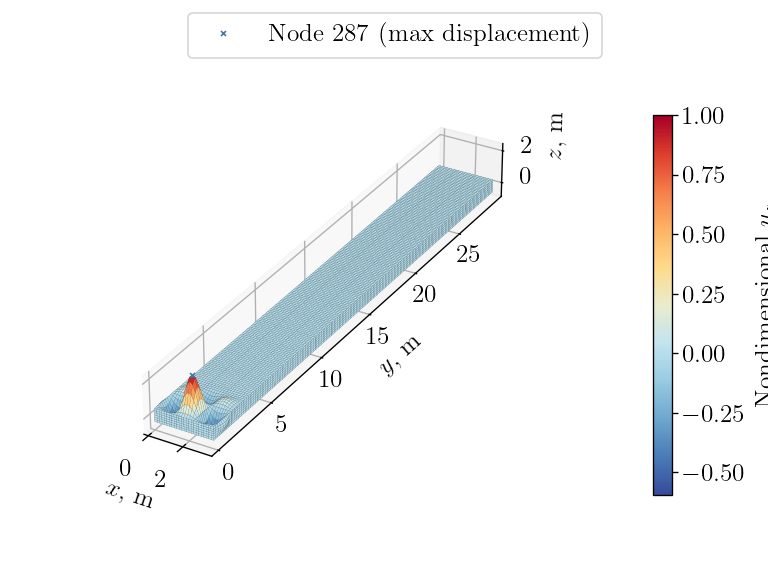

In [ ]:
from pyNastran.op2.op2 import read_op2

# Define function to adjust axes ticks and labels' position
def adjust_3d_plot(axes, colorbar=None):
    axes.locator_params(axis="x", nbins=3)  # set number of ticks of x-axis
    axes.locator_params(axis="z", nbins=2)  # set number of ticks of z-axis
    axes.tick_params(axis="y", which="major", pad=20)  # adjust position of ticks' label of y-axis
    axes.tick_params(axis="z", which="major", pad=6)  # adjust position of ticks' label of z-axis
    axes.yaxis.labelpad = 70  # adjust position of y-axis's label
    axes.zaxis.labelpad = 10  # adjust position of z-axis's label
    if colorbar is not None:
        colorbar.ax.set_position(colorbar.ax.get_position().shrunk(1.0, .66))  # decrease colorbar size
        colorbar.ax.set_position(colorbar.ax.get_position().translated(0, .14))  # move colorbar upwards

# Plot buckling mode
plt.rcParams.update({"font.size": default_font_size*1.9})  # increase default font size
amplification_factor = 2  # amplification factor for displacements
input_name = f"linear_buckling_{no_elements_converged_mesh}_elements"
sol_105_op2_filepath = os.path.join(ANALYSIS_DIRECTORY_PATH, input_name + ".op2")
sol_105_op2 = read_op2(op2_filename=sol_105_op2_filepath, load_geometry=True, debug=None)
fig, ax, cbar = pynastran_utils.plot_buckling_mode(op2_object=sol_105_op2, subcase_id=eigenvalue_calculation_subcase_id, displacement_component="tz", colormap="sunset",
                                                   length_unit='m', displacement_amplification_factor=amplification_factor, unit_scale_factor=1e-3)

# Plot node where maximum displacement occurs
max_displacement_index = np.argmax(np.linalg.norm(sol_105_op2.eigenvectors[eigenvalue_calculation_subcase_id].data[0, :, 0:3], axis=1))  # find index of max displacement magnitude
max_displacement_node_id = sol_105_op2.eigenvectors[eigenvalue_calculation_subcase_id].node_gridtype[max_displacement_index, 0]
max_displacement_node_xyz = sol_105_op2.nodes[max_displacement_node_id].xyz*1e-3 + sol_105_op2.eigenvectors[
    eigenvalue_calculation_subcase_id].data[0, max_displacement_index, 0:3]*amplification_factor  # add displacement to node position and convert to m
ax.plot(max_displacement_node_xyz[0], max_displacement_node_xyz[1], max_displacement_node_xyz[2], "x",
        label=f"Node {max_displacement_node_id:d} (max displacement)", zorder=4)
ax.legend()

# Adjust plot, show it and save figure
adjust_3d_plot(ax, cbar)
plt.show()
bbox = fig.bbox_inches.from_bounds(.5, .5, 6.5, 4.2)  # create bounding box for figure
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "BoxBeamCriticalBucklingMode.png"), format="png", bbox_inches=bbox, pad_inches=0, dpi=500)

Run nonlinear analysis with $P/P_\text{SOL 105}=2$ and plot load-displacement diagram in terms of local displacement $u_{z,\,287}$ nondimensionalized by the box beam width $w$.

subcase=0 already exists...skipping


Nastran job nonlinear_analysis_14976_elements.bdf completed
Wall time: 11224.0 s


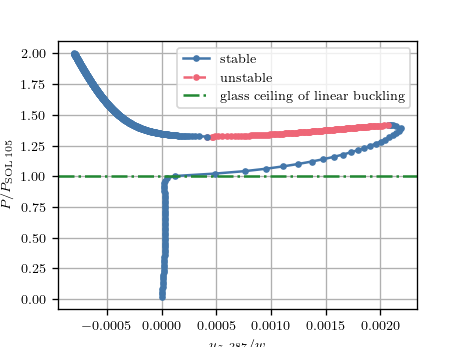

In [ ]:
# Create mesh with converged target element length
box_beam_mesh = box_beam_utils.mesh_stiffened_box_beam_with_pyvista(width=w, height=h, ribs_y_coordinates=ribs_y_locations,
                                                                    stiffeners_x_coordinates=stiffeners_x_locations,
                                                                    stiffeners_height=stiffeners_height,
                                                                    element_length=element_length_converged_mesh)

# Create BDF obejct and apply concentrated load at the tip
box_beam_bdf = box_beam_utils.create_base_bdf_input(E, nu, rho, t, box_beam_mesh.points, box_beam_mesh.faces.reshape(-1, 5)[:, 1:])
tip_master_node_id = apply_tip_concentrated_load(box_beam_bdf, force_set_id)

# Setup SOL 106 with arc-length method using parameters for fine resolution of equilibrium path
fine_nlparm_id = 1  # id of NLPARM card with fine arc-length method parameters
pynastran_utils.set_up_arc_length_method(bdf_object=box_beam_bdf, nlparm_id=fine_nlparm_id, eps_p=1e-3, eps_w=1e-7, ninc=100, max_bisect=10,
                                         minalr=.01, maxalr=1.0001, desiter=5, maxinc=2000)

# Apply load
load_set_id = force_set_id + 1  # id of load set
scale_factor = sol_105_buckling_load*2  # scale factor to apply to the load set
box_beam_bdf.add_load(sid=load_set_id, scale=1., scale_factors=[scale_factor], load_ids=[force_set_id])  # add LOAD card
loading_subcase_id = 1  # id of first subcase
pynastran_utils.create_static_load_subcase(bdf_object=box_beam_bdf, subcase_id=loading_subcase_id, load_set_id=load_set_id)  # create subcase with static load

# Run analysis
method_set_id = load_set_id + 1
no_eigenvalues = 20
input_name = f"nonlinear_analysis_{no_elements_converged_mesh}_elements"
sol_106_op2 = pynastran_utils.run_tangent_stiffness_matrix_eigenvalue_calculation(
    bdf_object=box_beam_bdf.__deepcopy__({}), method_set_id=method_set_id, no_eigenvalues=no_eigenvalues,
    analysis_directory_path=ANALYSIS_DIRECTORY_PATH, input_name=input_name, run_flag=False)

# Read load and displacement history
_, applied_loads, local_displacements = pynastran_utils.read_load_displacement_history_from_op2(op2_object=sol_106_op2,
                                                                                                displacement_node_id=max_displacement_node_id)
z_component_index = 2
nondimensional_applied_loads = applied_loads[loading_subcase_id][:, z_component_index]/sol_105_buckling_load
nondimensional_local_displacements = local_displacements[loading_subcase_id][:, z_component_index]/w

# Read eigenvalues obtained with refence mesh
f06_path = os.path.join(ANALYSIS_DIRECTORY_PATH, input_name + ".f06")  # path to .f06 file
eigenvalues = pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(f06_path)

# Create boolean mask for negative eigenvalues in any column
negative_eigenvalues_mask = (eigenvalues < 0).any(axis=0)

# Define function to plot load-displacement diagram segment by segment
def plot_segments(eigenvalues_mask, axes, disp, loads, marker, color):
    unstable_segments = []  # list to store indices of unstable segments
    stable_segments = []  # list to store indices of stable segments
    # Initialize the start index of the current segment
    start_idx = 0  
    # Loop through the negative_eigenvalues_mask to identify and plot segments
    for i, is_negative in enumerate(eigenvalues_mask):
        if is_negative:
            if stable_segments:
                # Plot the stable segment if there was one before
                stable_segments.append(i)  # make the stable segment finish at the first point of the unstable segment
                axes.plot(disp[stable_segments], loads[stable_segments], marker + "-", color=color)
                stable_segments = []  # reset the stable segment indices
            unstable_segments.append(i)  # add the current index to the unstable segment, this will overwrite the blue point with a red one
        else:
            if unstable_segments:
                # Plot the unstable segment if there was one before
                unstable_segments.append(i)  # make the unstable segment finish at the first point of the stable segment
                axes.plot(disp[unstable_segments], loads[unstable_segments], marker + "--", color=UNSTABLE_COLOR)
                unstable_segments = []  # reset the unstable segment indices
            stable_segments.append(i)  # add the current index to the stable segment, this will overwrite the red point with a blue one
    # Plot the remaining segments if any
    if stable_segments:
        axes.plot(disp[stable_segments], loads[stable_segments], marker + "-", color=color)
    if unstable_segments:
        axes.plot(disp[unstable_segments], loads[unstable_segments], marker + "--", color=UNSTABLE_COLOR)

# Plot load-displacement diagram
plt.rcParams.update({"font.size": default_font_size})  # reset default font size
plt.rcParams["lines.markersize"] = 3  # set default marker size of lines
fig, ax = plt.subplots(figsize=(textwidth_inches*scale, fig_height_inches*scale))
plot_segments(negative_eigenvalues_mask, ax, nondimensional_local_displacements, nondimensional_applied_loads, "o", colors[0])

# Plot glass ceiling of linear buckling
glass_ceiling_handle = ax.axhline(y=1, color=GLASS_CEILING_COLOR, linestyle="-.", label="glass ceiling of linear buckling")

# Create proxy artists for the legend
stable_line = Line2D([0], [0], linestyle="-", marker="o", color=colors[0], label="stable")
unstable_line = Line2D([0], [0], linestyle="--", marker="o", color=UNSTABLE_COLOR, label="unstable")

# Display the legend with the proxy artists
ax.legend(handles=[stable_line, unstable_line, glass_ceiling_handle])

# Set plot appearance
ax.set_xlabel(f"$u_{{z,\,{max_displacement_node_id:d}}}/w$")
ax.set_ylabel("$P/P_\mathrm{SOL\,105}$")
ax.grid()
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "InitialLocalDisplacement.svg"), format="svg", bbox_inches="tight", pad_inches=0)

Plot deformation over the box beam root before and after the snap.

Loss of stability at P/P_SOL/105 = 1.41
Deformation before snap:


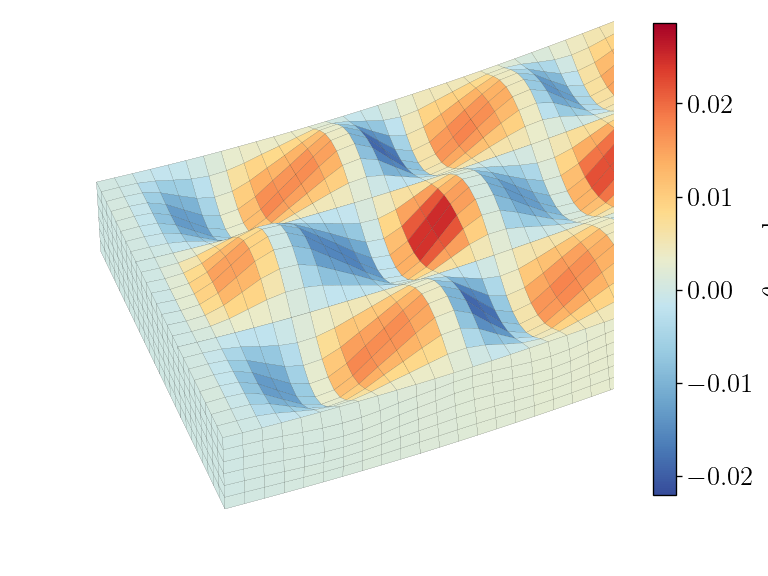

Deformation after snap:


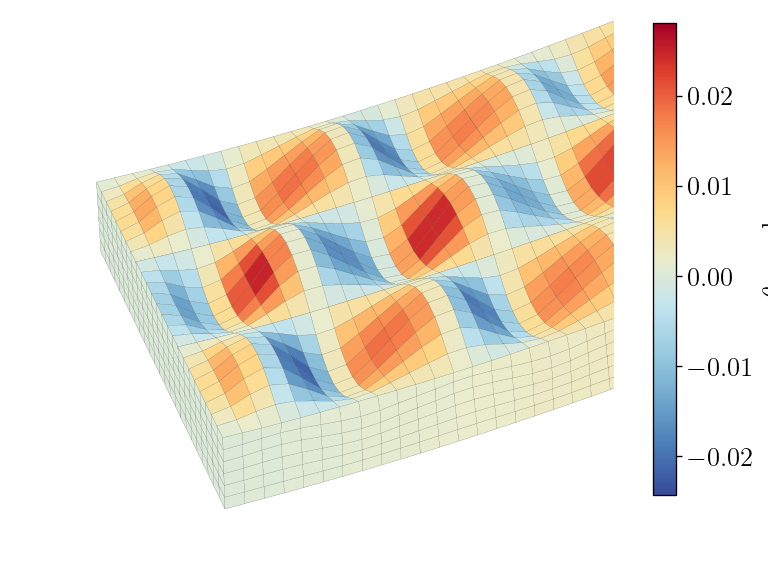

In [ ]:
# Plot deformation just before limit point
plt.rcParams.update({"font.size": default_font_size*2})  # increase default font size because figures are plotted side by side
first_negative_eigenvalue_index = np.where(negative_eigenvalues_mask)[0][0]
nondimensional_applied_load_before_limit_point = nondimensional_applied_loads[first_negative_eigenvalue_index-1]
print(f"Loss of stability at P/P_SOL/105 = {nondimensional_applied_load_before_limit_point:.2f}")
print("Deformation before snap:")
amplification_factor = 50  # amplification factor for displacements
fig, ax, cbar = pynastran_utils.plot_static_deformation(op2_object=sol_106_op2, subcase_id=loading_subcase_id, load_step=first_negative_eigenvalue_index,
                                                        displacement_component="rx", colormap="sunset", length_unit="m", unit_scale_factor=1e-3,
                                                        displacement_amplification_factor=amplification_factor)  # plot buckling mode converting from mm to m
adjust_3d_plot(ax)
cbar.ax.set_position(cbar.ax.get_position().shrunk(1.0, .82))  # decrease colorbar size
cbar.ax.set_position(cbar.ax.get_position().translated(0, .14))  # move colorbar upwards
ax.set_xlim(0, w*1e-3)
ax.set_ylim(0, 4*h*1e-3)
ax.set_zlim(-h/2*1e-3, h*1e-3)
ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f'get_{a}lim')() for a in 'xyz')])
plt.axis("off")
ax.view_init(40, -20)
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "BeforeSnap.svg"), format="svg", bbox_inches="tight", pad_inches=0)

# Find closest converged iteration to applied load after limit point
subsequent_values = nondimensional_applied_loads[first_negative_eigenvalue_index + 10:]
closest_index_in_subsequent = np.argmin(np.abs(subsequent_values - nondimensional_applied_load_before_limit_point))
closest_index = first_negative_eigenvalue_index + closest_index_in_subsequent
print("Deformation after snap:")

# Plot deformation after limit point
fig, ax, cbar = pynastran_utils.plot_static_deformation(op2_object=sol_106_op2, subcase_id=loading_subcase_id, load_step=closest_index + 1,
                                                      displacement_component="rx", colormap="sunset", length_unit="m", unit_scale_factor=1e-3,
                                                      displacement_amplification_factor=amplification_factor)  # plot buckling mode converting from mm to m
adjust_3d_plot(ax)
cbar.ax.set_position(cbar.ax.get_position().shrunk(1.0, .82))  # decrease colorbar size
cbar.ax.set_position(cbar.ax.get_position().translated(0, .14))  # move colorbar upwards
ax.set_xlim(0, w*1e-3)
ax.set_ylim(0, 4*h*1e-3)
ax.set_zlim(-h/2*1e-3, h*1e-3)
ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f'get_{a}lim')() for a in 'xyz')])
plt.axis("off")
ax.view_init(40, -20)
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "AfterSnap.svg"), format="svg", bbox_inches="tight", pad_inches=0)

Plot the eigenvalues of the tangent stiffness matrix.

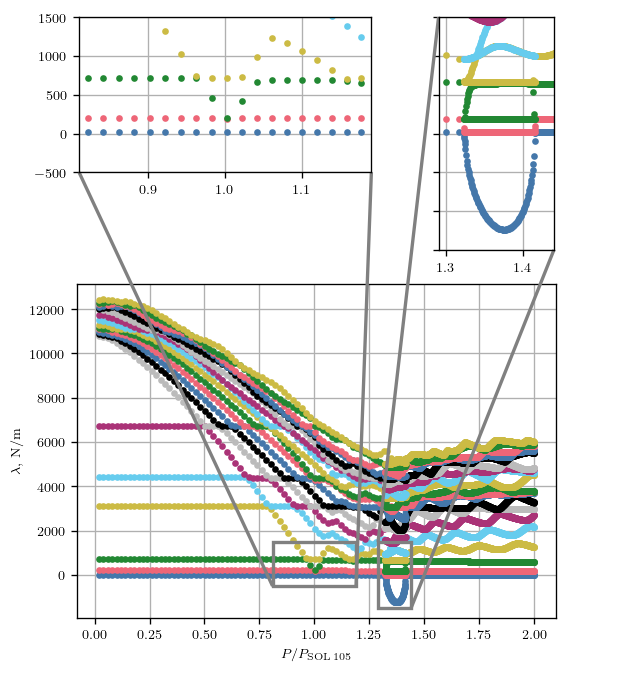

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes

# Create the figure
plt.rcParams.update({"font.size": default_font_size})  # reset default font size
fig, ax = plt.subplots(figsize=(textwidth_inches, fig_height_inches*1.5))
fig.subplots_adjust(top=.59)

# Plot eigenvalues vs applied load
plt.plot(nondimensional_applied_loads, eigenvalues.T*1e3, "o")  # convert eigenvalues from N/mm to N/m
plt.ylabel("$\lambda,\,\mathrm{N/m}$")
plt.xlabel("$P/P_\mathrm{SOL\,105}$")
plt.grid(True)

# Define zoom level
zoom_level = 3.5

# Create the first zoomed inset
x1, x2 = .81, 1.19  # region of interest for the first zoomed inset
axins1 = zoomed_inset_axes(ax, zoom_level, loc="upper left", bbox_to_anchor=(-.01, 1.82), bbox_transform=ax.transAxes)
axins1.plot(nondimensional_applied_loads, eigenvalues.T * 1e3, "o")
axins1.set_xlim(x1, x2)  # Adjust the limits as needed
axins1.set_ylim(-500, 1500)    # Adjust the limits as needed
axins1.set_xticks([0.9, 1.0, 1.1])
mark_inset(ax, axins1, loc1=3, loc2=4, fc="none", ec="0.5", linewidth=2, zorder=2)  # Connect to the region of interest

# Create the second zoomed inset
x1, x2 = 1.29, 1.44  # region of interest for the second zoomed inset
axins2 = zoomed_inset_axes(ax, zoom_level, loc="upper right", bbox_to_anchor=(1.01, 1.82), bbox_transform=ax.transAxes)
axins2.plot(nondimensional_applied_loads, eigenvalues.T * 1e3, "o")
axins2.set_xlim(x1, x2)  # Adjust the limits based on your region of interest
axins2.set_ylim(-1500, 1500)  # Adjust the limits as needed
axins2.tick_params(labelleft=False, labelbottom=True)
mark_inset(ax, axins2, loc1=2, loc2=4, fc="none", ec="0.5", linewidth=2, zorder=2)  # Connect to the region of interest

# Set the appearance of the insets
axins1.grid(True)
axins2.grid(True)

# Adjust layout for better appearance
# plt.tight_layout()
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "Eigenvalues.svg"), format="svg", pad_inches=0)

Plot load-displacement diagram in terms of tip displacement $u_{z,\,\mathrm{tip}}$ nondimensionalized by the box beam length $l$.

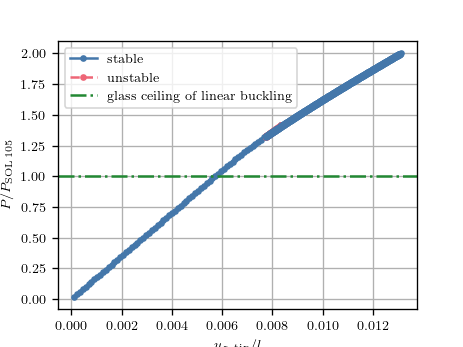

In [ ]:
# Read tip displacement history
_, _, tip_displacements = pynastran_utils.read_load_displacement_history_from_op2(op2_object=sol_106_op2, displacement_node_id=tip_master_node_id)
nondimensional_tip_displacements = tip_displacements[loading_subcase_id][:, z_component_index]/l

# Plot load-displacement diagram
fig, ax = plt.subplots(figsize=(textwidth_inches*scale, fig_height_inches*scale))
plot_segments(negative_eigenvalues_mask, ax, nondimensional_tip_displacements, nondimensional_applied_loads, "o", colors[0])

# Plot glass ceiling of linear buckling
glass_ceiling_handle = ax.axhline(y=1, color=GLASS_CEILING_COLOR, linestyle="-.", label="glass ceiling of linear buckling")

# Display the legend with the proxy artists
ax.legend(handles=[stable_line, unstable_line, glass_ceiling_handle])

# Set plot appearance
ax.set_xlabel("$u_{z,\,\mathrm{tip}}/l$")
ax.set_ylabel("$P/P_\mathrm{SOL\,105}$")
ax.grid()
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "InitialTipDisplacement.svg"), format="svg", bbox_inches="tight", pad_inches=0)

Run nonlinear analysis with coarse arc-length step size and plot 3D load-displacement diagram.

Nastran job nonlinear_analysis_coarse_arclength.bdf completed
Wall time: 197.0 s


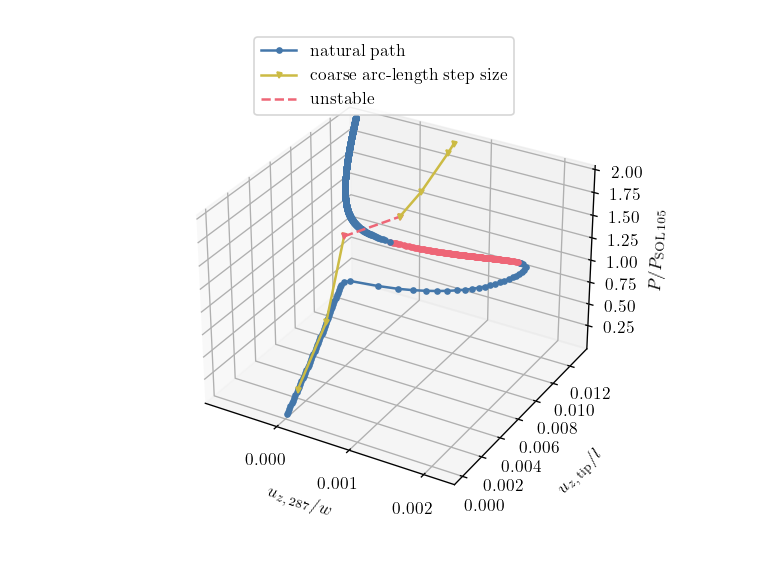

In [ ]:
from matplotlib import ticker  # import ticker module to set custom tick labels

markers = list(Line2D.markers.keys())[2:]  # list of marker characters

# Define coarse arc-length method parameters
coarse_nlparm_id = 2
pynastran_utils.set_up_arc_length_method(bdf_object=box_beam_bdf, nlparm_id=coarse_nlparm_id, subcase_id=loading_subcase_id)

# Run analysis
sol_106_op2 = {"natural path": sol_106_op2}
analysis_label = "coarse arc-length step size"
input_name = "nonlinear_analysis_coarse_arclength"
sol_106_op2[analysis_label] = pynastran_utils.run_tangent_stiffness_matrix_eigenvalue_calculation(
    bdf_object=box_beam_bdf.__deepcopy__({}), method_set_id=method_set_id, no_eigenvalues=no_eigenvalues,
    analysis_directory_path=ANALYSIS_DIRECTORY_PATH, input_name=input_name, run_flag=False)

# Read load and displacement history
_, applied_loads, local_displacements = pynastran_utils.read_load_displacement_history_from_op2(op2_object=sol_106_op2[analysis_label],
                                                                                                displacement_node_id=max_displacement_node_id)
_, _, tip_displacements = pynastran_utils.read_load_displacement_history_from_op2(op2_object=sol_106_op2[analysis_label],
                                                                                  displacement_node_id=tip_master_node_id)
nondimensional_applied_loads = {"natural path": nondimensional_applied_loads, analysis_label: applied_loads[loading_subcase_id][:, z_component_index]/sol_105_buckling_load}
nondimensional_local_displacements = {"natural path": nondimensional_local_displacements, analysis_label: local_displacements[loading_subcase_id][:, z_component_index]/w}
nondimensional_tip_displacements = {"natural path": nondimensional_tip_displacements, analysis_label: tip_displacements[loading_subcase_id][:, z_component_index]/l}

# Read eigenvalues obtained with refence mesh
f06_path = os.path.join(ANALYSIS_DIRECTORY_PATH, input_name + ".f06")  # path to .f06 file
eigenvalues = pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(f06_path)

# Create boolean mask for negative eigenvalues in any column
negative_eigenvalues_mask = {"natural path": negative_eigenvalues_mask, analysis_label: (eigenvalues < 0).any(axis=0)}

# Define function to plot 3D load-displacement diagram segment by segment
def plot_3d_segments(eigenvalues_mask, axes, local_disp, tip_disp, loads, marker, color):
    unstable_segments = []  # list to store indices of unstable segments
    stable_segments = []  # list to store indices of stable segments
    # Initialize the start index of the current segment
    start_idx = 0  
    # Loop through the negative_eigenvalues_mask to identify and plot segments
    for i, is_negative in enumerate(eigenvalues_mask):
        if is_negative:
            if stable_segments:
                # Plot the stable segment if there was one before
                stable_segments.append(i)  # make the stable segment finish at the first point of the unstable segment
                axes.plot3D(local_disp[stable_segments], tip_disp[stable_segments], loads[stable_segments], marker + "-", color=color)
                stable_segments = []  # reset the stable segment indices
            unstable_segments.append(i)  # add the current index to the unstable segment, this will overwrite the blue point with a red one
        else:
            if unstable_segments:
                # Plot the unstable segment if there was one before
                unstable_segments.append(i)  # make the unstable segment finish at the first point of the stable segment
                axes.plot3D(local_disp[unstable_segments], tip_disp[unstable_segments], loads[unstable_segments],  marker + "--", color=UNSTABLE_COLOR)
                unstable_segments = []  # reset the unstable segment indices
            stable_segments.append(i)  # add the current index to the stable segment, this will overwrite the red point with a blue one
    # Plot the remaining segments if any
    if stable_segments:
        axes.plot3D(local_disp[stable_segments], tip_disp[stable_segments], loads[stable_segments], marker + "-", color=color)
    if unstable_segments:
        axes.plot3D(local_disp[unstable_segments], tip_disp[unstable_segments], loads[unstable_segments], marker + "--", color=UNSTABLE_COLOR)

# Plot load-displacement diagram
plt.rcParams.update({"font.size": default_font_size*1.3})  # increase default font size because 3d plot will be scaled down
fig = plt.figure()
ax_3d = plt.axes(projection="3d")
stable_lines = []  # list to store Line2D objects for stable segments
for count, key in enumerate(nondimensional_local_displacements):
    plot_3d_segments(negative_eigenvalues_mask[key], ax_3d, nondimensional_local_displacements[key], nondimensional_tip_displacements[key], nondimensional_applied_loads[key],
    markers[count], colors[count])
    stable_lines.append(Line2D([0], [0], linestyle="-", marker=markers[count], color=colors[count], label=key))  # create proxy artist for the legend

# Add proxy artist for unstable lines and create legend
unstable_line = Line2D([0], [0], linestyle="--", color=UNSTABLE_COLOR, label="unstable")
fig.legend(handles=stable_lines + [unstable_line], loc="upper center", bbox_to_anchor=(0.5, 0.95))

# Set plot appearance
ax_3d.set_xlabel(f"$u_{{z,\,{max_displacement_node_id:d}}}/w$")
ax_3d.set_ylabel("$u_{z,\,\mathrm{tip}}/l$", labelpad=10)
ax_3d.set_zlabel("$P/P_\mathrm{SOL\,105}$")
ax_3d.locator_params(axis="x", nbins=6)  # set number of ticks of x-axis
ax_3d.grid(visible=True)
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "CoarseArcLength.svg"), format="svg", bbox_inches="tight", pad_inches=0)

Unload structure from last equilibrium point of previous analysis and plot 3D load-displacement diagram.

Nastran job equilibrium_path_verification.bdf completed
Wall time: 1005.0 s


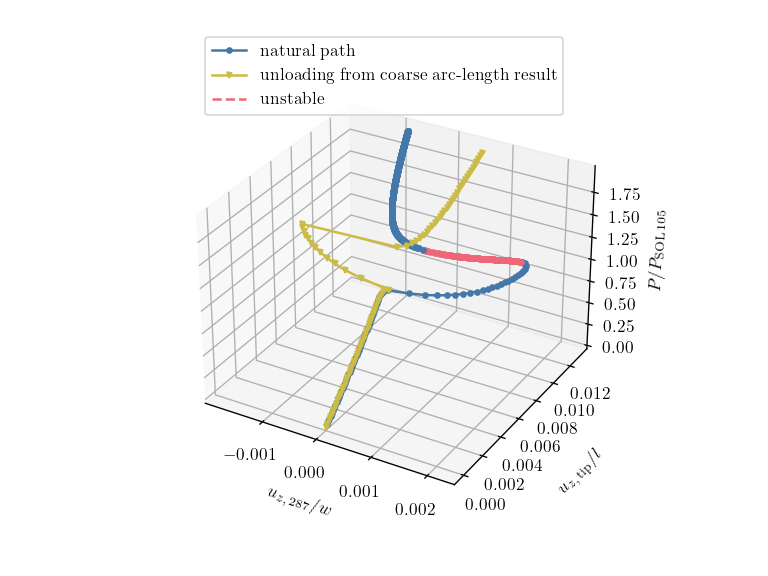

In [ ]:
# Define second subcase
zero_load_set_id = load_set_id + 1  # id of LOAD card
box_beam_bdf.add_load(zero_load_set_id, scale=1., scale_factors=[0.], load_ids=[force_set_id])  # add LOAD card with zero applied load
unloading_subcase_id = 2  # id of second subcase
pynastran_utils.create_static_load_subcase(bdf_object=box_beam_bdf, subcase_id=unloading_subcase_id, load_set_id=zero_load_set_id)  # create subcase with zero applied load
box_beam_bdf.case_control_deck.subcases[unloading_subcase_id].add_integer_type('NLPARM', fine_nlparm_id)  # use NLPARM with fine arc-length method parameters in second subcase

# Run analysis
analysis_label = "unloading from coarse arc-length result"
input_name = "equilibrium_path_verification"
sol_106_op2[analysis_label] = pynastran_utils.run_tangent_stiffness_matrix_eigenvalue_calculation(
    bdf_object=box_beam_bdf.__deepcopy__({}), method_set_id=method_set_id, no_eigenvalues=no_eigenvalues,
    analysis_directory_path=ANALYSIS_DIRECTORY_PATH, input_name=input_name, run_flag=False)

# Read load and displacement history
_, applied_loads, local_displacements = pynastran_utils.read_load_displacement_history_from_op2(op2_object=sol_106_op2[analysis_label],
                                                                                                displacement_node_id=max_displacement_node_id)
_, _, tip_displacements = pynastran_utils.read_load_displacement_history_from_op2(op2_object=sol_106_op2[analysis_label],
                                                                                  displacement_node_id=tip_master_node_id)
nondimensional_applied_loads[analysis_label] = applied_loads[unloading_subcase_id][:, z_component_index]/sol_105_buckling_load
nondimensional_local_displacements[analysis_label] = local_displacements[unloading_subcase_id][:, z_component_index]/w
nondimensional_tip_displacements[analysis_label] = tip_displacements[unloading_subcase_id][:, z_component_index]/l

# Read eigenvalues obtained with refence mesh
f06_path = os.path.join(ANALYSIS_DIRECTORY_PATH, input_name + ".f06")  # path to .f06 file
eigenvalues = pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(f06_path)

# Create boolean mask for negative eigenvalues in any column
negative_eigenvalues_mask[analysis_label] = (eigenvalues[:, -len(nondimensional_applied_loads[analysis_label]):] < 0).any(axis=0)

# Plot load-displacement diagram
fig = plt.figure()
ax_3d = plt.axes(projection="3d")
labels = ["natural path", analysis_label]
stable_lines = []  # list to store Line2D objects for stable segments
for count, key in enumerate(labels):
    plot_3d_segments(negative_eigenvalues_mask[key], ax_3d, nondimensional_local_displacements[key], nondimensional_tip_displacements[key], nondimensional_applied_loads[key],
    markers[count], colors[count])
    stable_lines.append(Line2D([0], [0], linestyle="-", marker=markers[count], color=colors[count], label=key))  # create proxy artist for the legend

# Create legend
fig.legend(handles=stable_lines + [unstable_line], loc="upper center", bbox_to_anchor=(0.5, 0.95))

# Set plot appearance
ax_3d.set_xlabel(f"$u_{{z,\,{max_displacement_node_id:d}}}/w$")
ax_3d.locator_params(axis="x", nbins=6)  # set number of ticks of x-axis
ax_3d.set_ylabel("$u_{z,\,\mathrm{tip}}/l$", labelpad=10)
ax_3d.set_zlabel("$P/P_\mathrm{SOL\,105}$")
ax_3d.grid(visible=True)
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "Unloading.svg"), format="svg", bbox_inches="tight", pad_inches=0)

Repeat analysis with $MAXITER=2$ and plot 3D load-displacement diagram.

Nastran job equilibrium_path_verification_maxiter2.bdf completed
Wall time: 10642.0 s


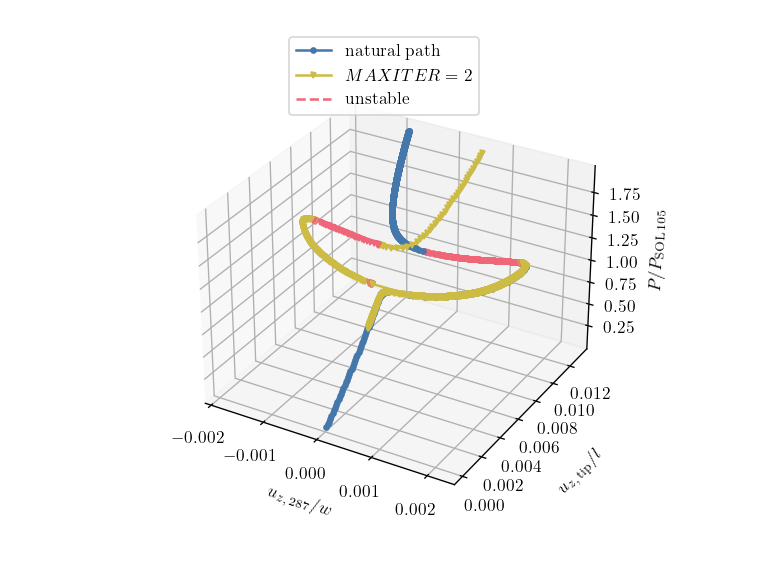

In [ ]:
# Change nonlinear analysis parameters of second subcase
box_beam_bdf.nlparms[fine_nlparm_id].max_iter = 2  # set maximum number of iterations to 2

# Run analysis
analysis_label = "$MAXITER=2$"
input_name = "equilibrium_path_verification_maxiter2"
sol_106_op2[analysis_label] = pynastran_utils.run_tangent_stiffness_matrix_eigenvalue_calculation(
    bdf_object=box_beam_bdf.__deepcopy__({}), method_set_id=method_set_id, no_eigenvalues=no_eigenvalues,
    analysis_directory_path=ANALYSIS_DIRECTORY_PATH, input_name=input_name, run_flag=False)

# Read load and displacement history
_, applied_loads, local_displacements = pynastran_utils.read_load_displacement_history_from_op2(op2_object=sol_106_op2[analysis_label],
                                                                                                displacement_node_id=max_displacement_node_id)
_, _, tip_displacements = pynastran_utils.read_load_displacement_history_from_op2(op2_object=sol_106_op2[analysis_label],
                                                                                  displacement_node_id=tip_master_node_id)
nondimensional_applied_loads[analysis_label] = applied_loads[unloading_subcase_id][:, z_component_index]/sol_105_buckling_load
nondimensional_local_displacements[analysis_label] = local_displacements[unloading_subcase_id][:, z_component_index]/w
nondimensional_tip_displacements[analysis_label] = tip_displacements[unloading_subcase_id][:, z_component_index]/l

# Read eigenvalues obtained with refence mesh
f06_path = os.path.join(ANALYSIS_DIRECTORY_PATH, input_name + ".f06")  # path to .f06 file
eigenvalues = pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(f06_path)

# Create boolean mask for negative eigenvalues in any column
negative_eigenvalues_mask[analysis_label] = (eigenvalues[:, -len(nondimensional_applied_loads[analysis_label]):] < 0).any(axis=0)

# Plot load-displacement diagram
fig = plt.figure()
ax_3d = plt.axes(projection="3d")
labels = ["natural path", analysis_label]
stable_lines = []  # list to store Line2D objects for stable segments
for count, key in enumerate(labels):
    plot_3d_segments(negative_eigenvalues_mask[key], ax_3d, nondimensional_local_displacements[key], nondimensional_tip_displacements[key], nondimensional_applied_loads[key],
    markers[count], colors[count])
    stable_lines.append(Line2D([0], [0], linestyle="-", marker=markers[count], color=colors[count], label=key))  # create proxy artist for the legend

# Create legend
fig.legend(handles=stable_lines + [unstable_line], loc="upper center", bbox_to_anchor=(0.5, 0.95))

# Set plot appearance
ax_3d.set_xlabel(f"$u_{{z,\,{max_displacement_node_id:d}}}/w$")
ax_3d.locator_params(axis="x", nbins=6)  # set number of ticks of x-axis
ax_3d.set_ylabel("$u_{z,\,\mathrm{tip}}/l$", labelpad=10)
ax_3d.set_zlabel("$P/P_\mathrm{SOL\,105}$")
ax_3d.grid(visible=True)
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "Maxiter2.svg"), format="svg", bbox_inches="tight", pad_inches=0)

## Optimization of the CRM-like box beam with nonlinear structural stability constraints <a name="optimization"></a>

***

Optimization results are taken from the notebook titled [_One-variable Optimization of the CRM-like Box Beam_](19_One-variable_Optimization_of_the_CRM-like_Box_Beam.ipynb).

In [ ]:
import openmdao.api as om  # make available the most common OpenMDAO classes and functions
from matplotlib.ticker import MaxNLocator  # import class to set the number of ticks of an axis

# Instantiate CaseReader object
optimization_results_directory_name = "19_One-variable_Optimization_of_the_CRM-like_Box_Beam"
optimization_results_directory_path = os.path.join(os.getcwd(), "analyses", optimization_results_directory_name)  # path to optimization results
cr = om.CaseReader(os.path.join(optimization_results_directory_path, "first_optimization.sql"))  # path to cases database

# Get driver cases (do not recurse to system/solver cases) - driver cases represent the snapshots of all the variable values, metadata, and options of the model
driver_cases = cr.get_cases("driver", recurse=False)

# Retrieve the optimization history in terms of objective, design variable and constraints
keys = ["sol_106.mass", "sol_106.t", "sol_106.ks_stability", "sol_106.ks_stress", "sol_106.applied_load"]  # keys of the functions to retrieve
histories = {key: np.stack([case[key][0] for case in driver_cases], axis=0) for key in keys}  # retrieve histories of the functions

# Print mass percentage variation w.r.t. initial design and final value of thickness and constraints
mass_0 = histories["sol_106.mass"][0]
mass_percentage_variation = (histories["sol_106.mass"][-1]/mass_0 - 1)*100
print(f"""Mass variation: {mass_percentage_variation:.1f} %
Final thickness: {histories["sol_106.t"][-1]:.1f} mm
Final KS value of nonlinear structural stability: {histories["sol_106.ks_stability"][-1]:.2f} N/m
Final KS value for stress: {histories["sol_106.ks_stress"][-1]:.0f} MPa""")

Mass variation: -11.3 %
Final thickness: 6.8 mm
Final KS value of nonlinear structural stability: -0.01 N/m
Final KS value for stress: -383 MPa


Plot optimization history.

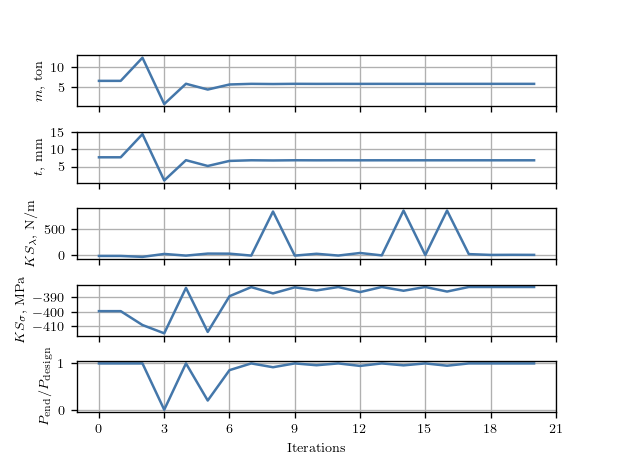

In [ ]:
# Create figure with five subplots sharing the x-axis
plt.rcParams.update({"font.size": default_font_size})  # reset default font size
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, figsize=(textwidth_inches, fig_height_inches))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

# Plot mass history
iterations_array = np.arange(len(histories["sol_106.mass"]))
ax1.plot(iterations_array, histories["sol_106.mass"])
ax1.set(ylabel="$m,\,\mathrm{ton}$")
ax1.grid()

# Plot thickness history
ax2.plot(iterations_array, histories["sol_106.t"])
ax2.set(ylabel="$t,\,\mathrm{mm}$")
ax2.grid()

# Plot nonlinear structural stability KS function history
ax3.plot(iterations_array, histories["sol_106.ks_stability"])
ax3.set(ylabel="$KS_{\lambda},\,\mathrm{N/m}$")
ax3.grid()

# Plot stress KS function history
ax4.plot(iterations_array, histories["sol_106.ks_stress"])
ax4.set(ylabel="$KS_{\sigma},\,\mathrm{MPa}$")
ax4.grid()

# Plot applied load history
ax5.plot(iterations_array, histories["sol_106.applied_load"]/sol_105_buckling_load)
ax5.set(xlabel="Iterations", ylabel="$P_\mathrm{end}/P_\mathrm{design}$")
ax5.xaxis.set_major_locator(MaxNLocator(integer=True))
ax5.grid()

# Show plot
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "OptimizationHistory.svg"), format="svg", bbox_inches="tight", pad_inches=0)

Plot load-displacement diagram comparing initial and optimized structure.

Linear buckling load of optimized structure: P_SOL105/P_design=0.71


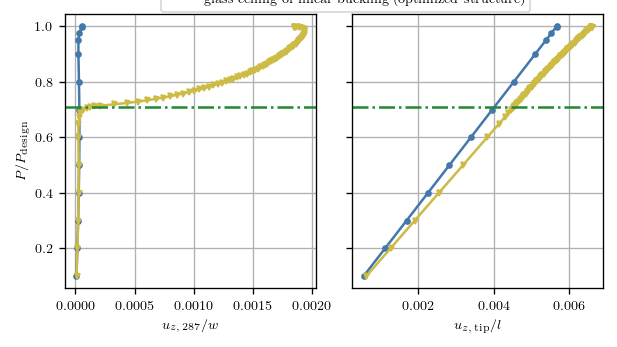

In [ ]:
# Read linear buckling load of optimized structure
sol_105_op2_filepath = os.path.join(optimization_results_directory_path, "box_beam_opt_sol_105.op2")
sol_105_op2 = read_op2(op2_filename=sol_105_op2_filepath, debug=None)
nondimensional_linear_buckling_load = sol_105_op2.eigenvectors[eigenvalue_calculation_subcase_id].eigr
print(f"Linear buckling load of optimized structure: P_SOL105/P_design={nondimensional_linear_buckling_load:.2f}")

# Define a dictionary for input names
input_name_dict = {"box_beam_sol_106_start": "initial structure", "box_beam_sol_106": "optimized structure"}

# Create one figure with two subplots side by side
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(textwidth_inches, fig_height_inches*scale))

# Loop through input names and perform data processing and plotting
sol_106_op2 = {}  # dictionary to store OP2 objects
stable_lines = []  # list to store Line2D objects for stable segments
for count, key in enumerate(input_name_dict.keys()):
    sol_106_op2_filepath = os.path.join(optimization_results_directory_path, key + ".op2")
    sol_106_op2[key] = read_op2(op2_filename=sol_106_op2_filepath, load_geometry=True, debug=None)
    
    # Read and store applied loads and local displacements
    _, applied_loads, local_displacements = pynastran_utils.read_load_displacement_history_from_op2(
        op2_object=sol_106_op2[key],
        displacement_node_id=max_displacement_node_id
    )
    nondimensional_applied_loads = applied_loads[loading_subcase_id][:, z_component_index] / sol_105_buckling_load
    nondimensional_local_displacements = local_displacements[loading_subcase_id][:, z_component_index] / w

    # Read eigenvalues obtained with refence mesh
    f06_path = os.path.join(optimization_results_directory_path, key + ".f06")  # path to .f06 file
    eigenvalues = pynastran_utils.read_kllrh_lowest_eigenvalues_from_f06(f06_path)

    # Create boolean mask for negative eigenvalues in any column
    negative_eigenvalues_mask = (eigenvalues < 0).any(axis=0)
    
    # Plot on the first subplot
    plot_segments(negative_eigenvalues_mask, axes[0], nondimensional_local_displacements, nondimensional_applied_loads, markers[count], colors[count])
    stable_lines.append(Line2D([0], [0], linestyle="-", marker=markers[count], color=colors[count], label=input_name_dict[key]))  # create proxy artist for the legend

    # Read and store tip displacements
    _, _, tip_displacements = pynastran_utils.read_load_displacement_history_from_op2(
        op2_object=sol_106_op2[key],
        displacement_node_id=tip_master_node_id
    )
    nondimensional_tip_displacements = tip_displacements[loading_subcase_id][:, z_component_index] / l

    # Plot on the second subplot
    plot_segments(negative_eigenvalues_mask, axes[1], nondimensional_tip_displacements, nondimensional_applied_loads, markers[count], colors[count])

# Plot the line of the glass ceiling of linear buckling for final design on both subplots
for ax in axes:
    ax.axhline(y=nondimensional_linear_buckling_load, color=GLASS_CEILING_COLOR, linestyle="-.")

# Create legend
glass_ceiling_line = Line2D([0], [0], linestyle="-.", color=GLASS_CEILING_COLOR, label="glass ceiling of linear buckling (optimized structure)")
fig.legend(handles=stable_lines + [glass_ceiling_line], loc="upper left", bbox_to_anchor=(0.25, 1.16))

# Set plot appearance for the first subplot
axes[0].set_xlabel(f"$u_{{z,\,{max_displacement_node_id:d}}}/w$")
axes[0].set_ylabel("$P/P_\mathrm{design}$")
axes[0].grid(visible=True)

# Set plot appearance for the second subplot
axes[1].set_xlabel("$u_{z,\,\mathrm{tip}}/l$")
axes[1].grid(visible=True)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()
fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, "OptimizedLoadDisplacement.svg"), format="svg", bbox_inches="tight", pad_inches=0)


Compare deformation at design load of initial and optimized structure.

Deformation of initial structure:


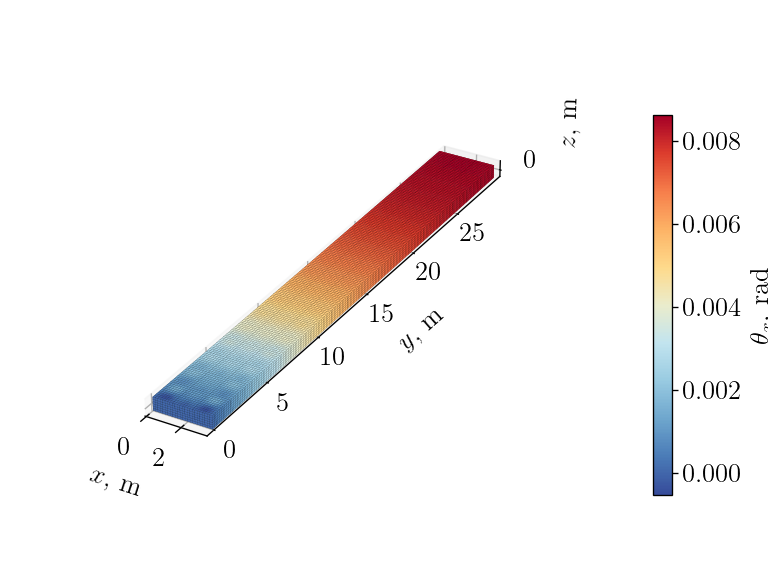

Deformation of optimized structure:


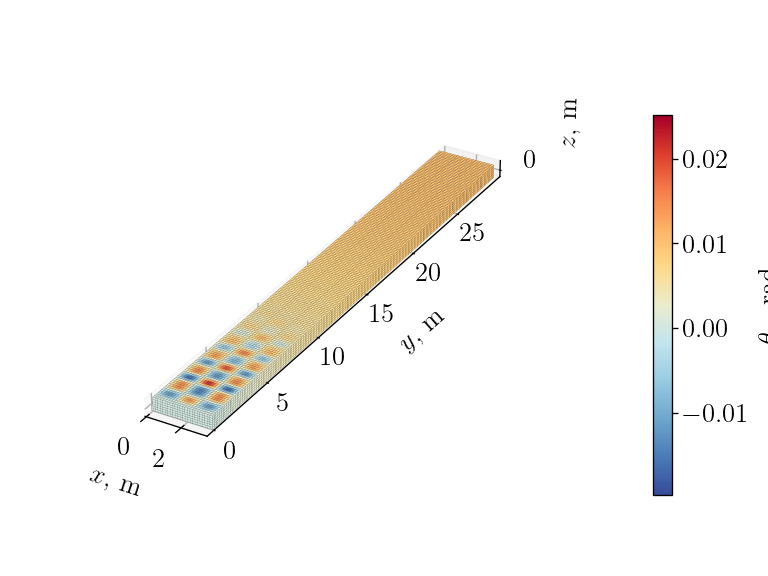

In [ ]:
plt.rcParams.update({"font.size": default_font_size*2})  # increase default font size because figures are rendered side by side in the paper
for count, key in enumerate(input_name_dict.keys()):
    print(f"Deformation of {input_name_dict[key]}:")
    fig, ax, cbar = pynastran_utils.plot_static_deformation(op2_object=sol_106_op2[key], subcase_id=loading_subcase_id, displacement_component="rx",
                                                            colormap="sunset", length_unit="m", unit_scale_factor=1e-3)  # plot deformation converting from mm to m
    ax.locator_params(axis="x", nbins=3)  # set number of ticks of x-axis
    ax.set_zticks([0])  # set ticks of z-axis
    ax.tick_params(axis="y", which="major", pad=40)  # adjust position of ticks' label of y-axis
    ax.tick_params(axis="z", which="major", pad=10)  # adjust position of ticks' label of z-axis
    ax.xaxis.labelpad = 10  # adjust position of x-axis's label
    ax.yaxis.labelpad = 150  # adjust position of y-axis's label
    ax.zaxis.labelpad = 20  # adjust position of z-axis's label
    cbar.ax.set_position(cbar.ax.get_position().shrunk(1.0, .66))  # decrease colorbar size
    cbar.ax.set_position(cbar.ax.get_position().translated(0, .14))  # move colorbar upwards
    plt.show()
    fig.savefig(os.path.join(ANALYSIS_DIRECTORY_PATH, f"deformation_{key}.png"), format="png", bbox_inches=bbox, pad_inches=0, dpi=500)